Install libraries ที่ต้องการใช้งาน

In [ ]:
%pip install pandas
%pip install numpy
%pip install plotly
%pip install mlxtend

#Data Exploration

Import libraries

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

import dataset และ แสดงขนาดของข้อมูล โดยชุดข้อมูลมีทั้งหมด 30,000 แถว 13 คอลัมน์

In [ ]:
# dataset
retail_data = pd.read_csv("Retail_Transactions_Dataset.csv")
# printing the shape of the dataset
retail_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(30000, 13)

แสดงประเภทข้อมูลแต่ละคอลัมน์

In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          20009 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


แสดงตัวอย่างชุดข้อมูล 5 แถวแรก

In [ ]:
# printing the columns and few rows using head
retail_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,NaN
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,NaN
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,NaN


แสดงค่าทางสถิติของชุดข้อมูล เพื่อดูการกระจายตัวของข้อมูล

In [ ]:
retail_data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_ID,Total_Items,Total_Cost
count,3.000000e+04,30000.000000,30000.000000
mean,1.000015e+09,5.497800,52.504527
std,8.660398e+03,2.873686,27.363732
min,1.000000e+09,1.000000,5.000000
25%,1.000007e+09,3.000000,28.687500
50%,1.000015e+09,5.000000,52.480000
75%,1.000022e+09,8.000000,76.100000
max,1.000030e+09,10.000000,99.990000


ตรวจสอบค่า Null ในชุดข้อมูล

พบว่ามีค่า Null ในคอลัมน์ Promotion อยู่ที่ 9,991

In [ ]:
retail_data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction_ID          0
Date                    0
Customer_Name           0
Product                 0
Total_Items             0
Total_Cost              0
Payment_Method          0
City                    0
Store_Type              0
Discount_Applied        0
Customer_Category       0
Season                  0
Promotion            9991
dtype: int64

#Data Visualization

กราฟแท่งแสดงการกระจายตัวของคอลัมน์ที่เป็นประเภทตัวเลข โดยมีคอลัมน์ Transaction_ID, Total_Items และ Total_Cost

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


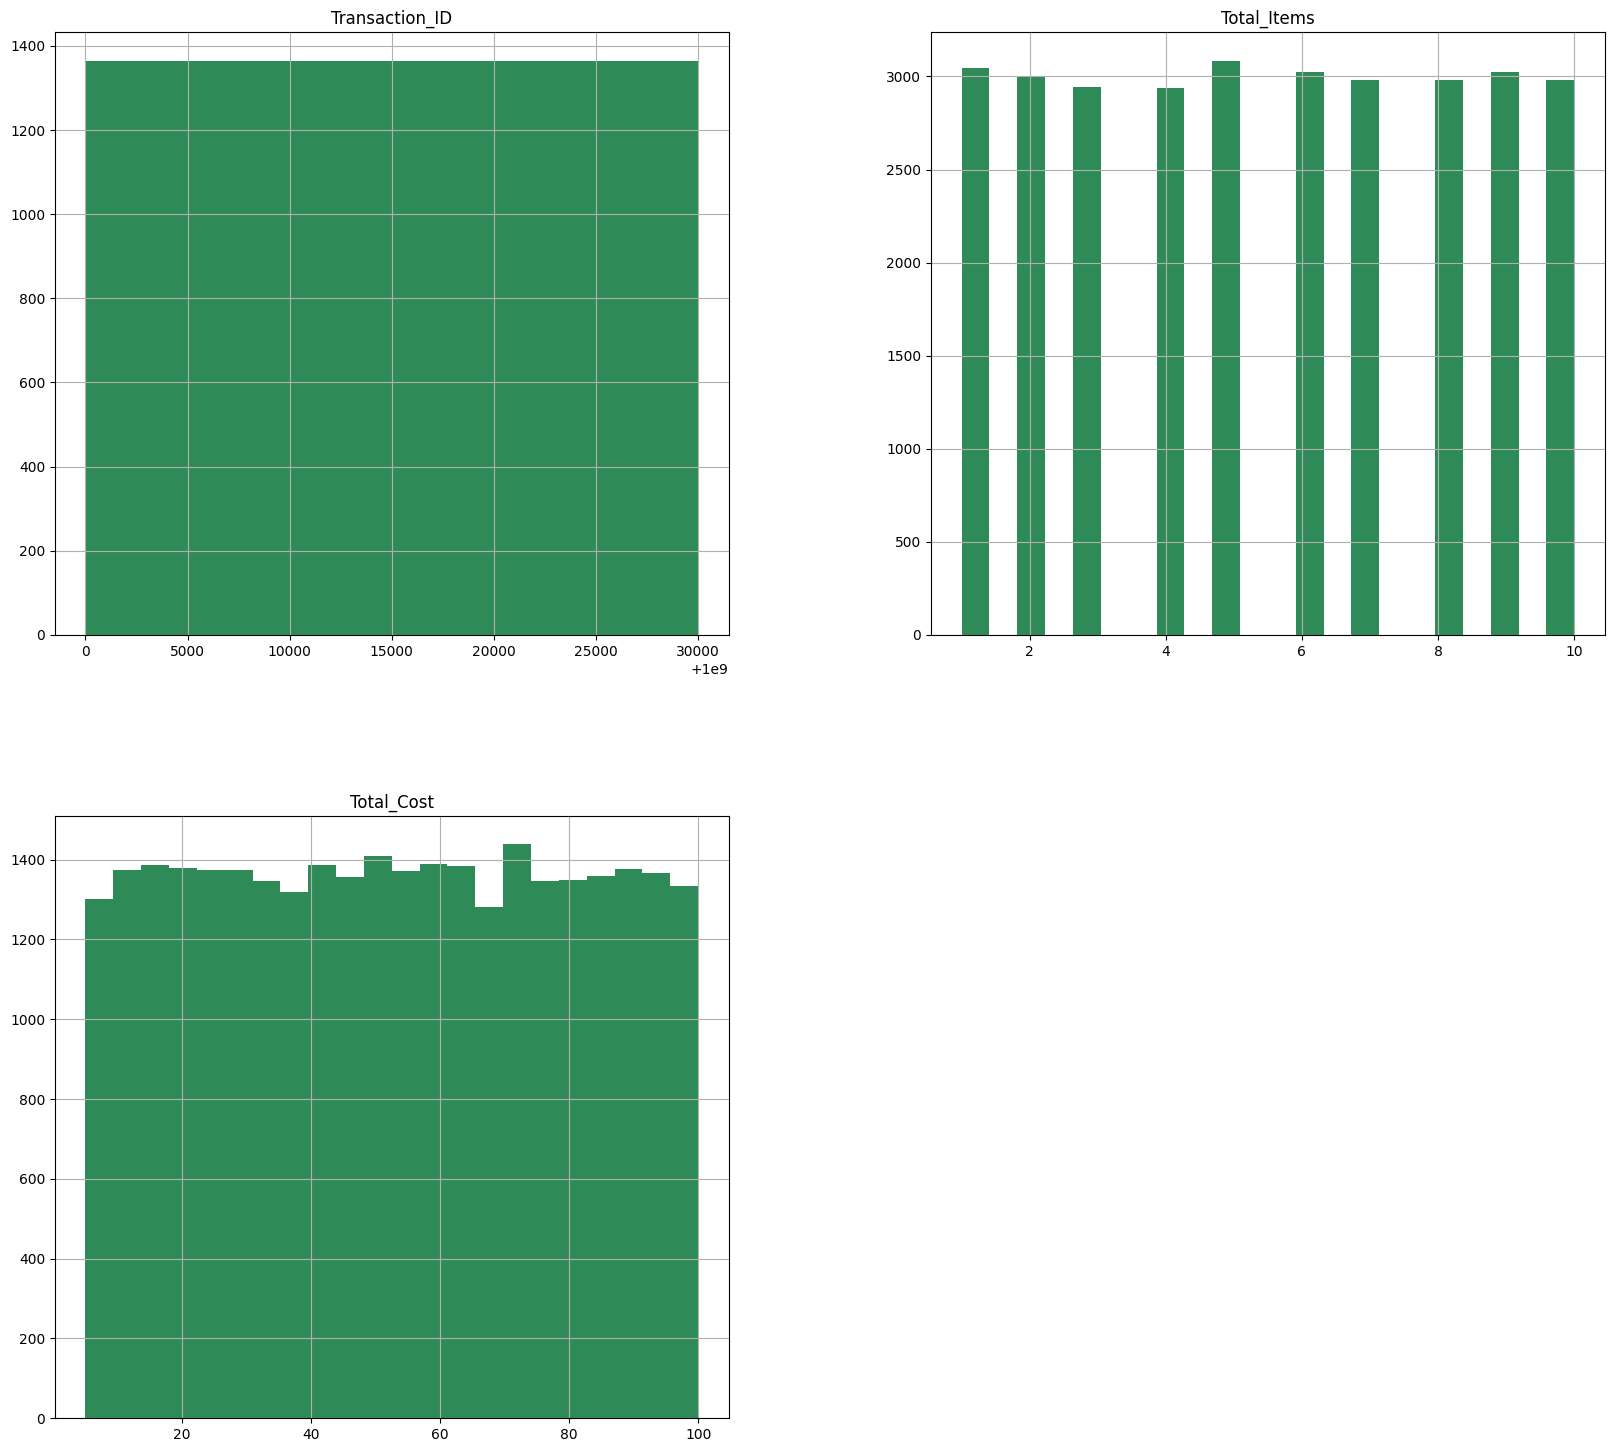

In [ ]:
retail_data.hist(bins = 22, color = 'seagreen', figsize = (20, 18), grid = True)
plt.show()

กราฟแสดงการกระจายตัวของคอลัมน์ต่างๆ ที่เก็บค่าเป็นตัวอักษร

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-f794a309fa4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=selected_df, x=feature, palette='Paired')
<ipython-input-12-f794a309fa4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=selected_df, x=feature, palette='Paired')
<ipython-input-12-f794a309fa4a>:8: FutureWarning: 

Passing `palette` without assig

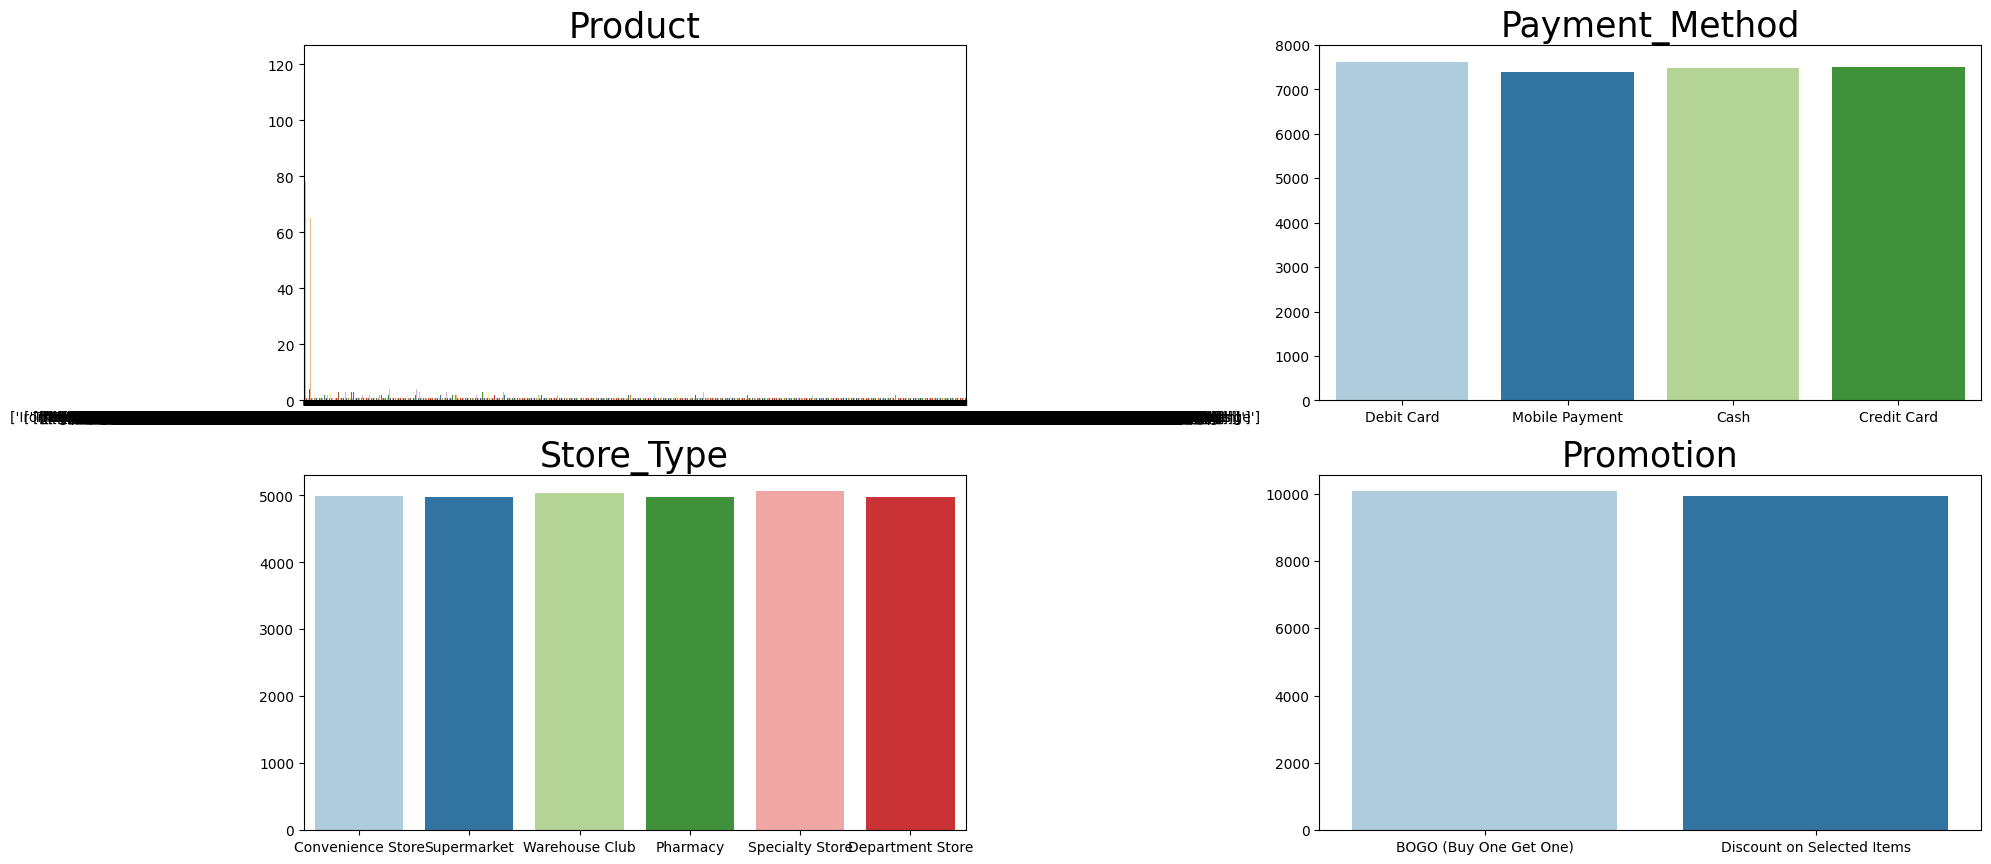

In [ ]:
selected_columns = [col for col in retail_data.columns if col not in ['Transaction_ID', 'Total_Items'	,'Total_Cost', 'Date', 'City', 'Customer_Name', 'Discount_Applied', 'Season', 'Customer_Category']]
selected_df = retail_data[selected_columns]

plt.figure(figsize=(20, 30))

for i, feature in enumerate(selected_df.columns):
    plt.subplot(7, 2, i+1)
    sns.countplot(data=selected_df, x=feature, palette='Paired')
    plt.xticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(feature, fontsize = 25)

plt.tight_layout()
plt.show()

Pie graph แสดงอาชีพของลูกค้า

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-73-45a7049234ad>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



Text(0.5, 1.0, 'Customer Category')

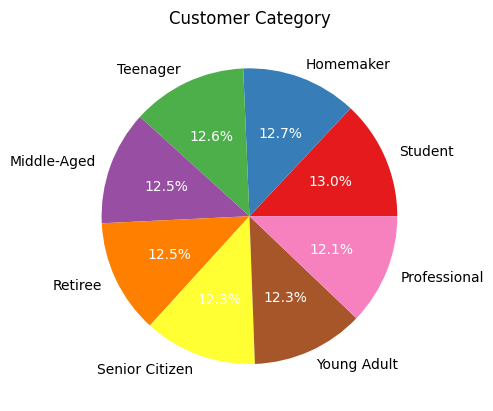

In [ ]:
from matplotlib import cm
c1 = cm.get_cmap('Set1')
val = retail_data["Customer_Category"].value_counts()
wedges,texts,autotexts = plt.pie(val,labels = val.index,autopct="%1.1f%%")
colors = [c1(i) for i in np.arange(0.1,0.9,0.1)]
for i in range(len(wedges)):
    wedges[i].set_facecolor(colors[i])
    autotexts[i].set_color('white')
plt.title('Customer Category')

ทำการแปลงคอลัมน์ Product จากประเภท object เป็น ประเภท list และเก็บค่าไว้ในตัวแปร all_transaction

In [ ]:
all_transaction = retail_data['Product'].to_list()
all_transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


["['Hair Gel']",
 "['Tuna', 'Bread', 'Tissues', 'Trash Bags']",
 "['Jam', 'Soap', 'Ketchup']",
 "['BBQ Sauce']",
 "['Hand Sanitizer', 'Bread', 'Extension Cords', 'Ice Cream', 'Hand Sanitizer']",
 "['Shower Gel', 'Baby Wipes', 'Banana', 'Paper Towels']",
 "['Cereal', 'Tuna']",
 "['Iron', 'Extension Cords', 'Eggs', 'Iron', 'Tuna']",
 "['Banana', 'Pickles']",
 "['Ketchup', 'Razors', 'Lawn Mower']",
 "['Shrimp', 'Soda']",
 "['Soap', 'Vacuum Cleaner', 'Shower Gel', 'Mayonnaise']",
 "['BBQ Sauce', 'Soda', 'Lawn Mower']",
 "['Ironing Board', 'Laundry Detergent', 'Deodorant', 'Cereal']",
 "['Lawn Mower', 'Tea']",
 "['Syrup']",
 "['Tea', 'Spinach', 'Mustard', 'Cleaning Rags', 'Peanut Butter']",
 "['Tuna', 'Bath Towels', 'Potatoes']",
 "['Syrup', 'Yogurt', 'Eggs']",
 "['Eggs']",
 "['Eggs', 'Razors', 'Peanut Butter', 'Toothpaste', 'Cheese']",
 "['Shrimp', 'Milk', 'Dish Soap']",
 "['Cereal', 'Water', 'Bread', 'Laundry Detergent']",
 "['Insect Repellent', 'Soda', 'Laundry Detergent']",
 "['Dishware

สร้าง list ที่จะทำการเก็บ product แต่ละ item โดยการวน loop ตัวแปร all_transaction เพื่อดึงทีละ item เก็บไว้ใน list transaction และทำการแปลง list transaction ให้เป็น numpy array

In [ ]:
from itertools import chain
import ast

transaction = []

df = pd.DataFrame(all_transaction)
flat_list = list(chain.from_iterable(df.values))
for item in flat_list:
  item_list = ast.literal_eval(item)
  for i in item_list:
    transaction.append(i)

transaction = np.array(transaction)
print(transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Hair Gel' 'Tuna' 'Bread' ... 'Hair Gel' 'Mop' 'Peanut Butter']


ทำการสร้าง dataframe transaction โดยกำหนดคอลัมน์แรก คือ รายการต่างๆ คอลัมน์ที่สองคือ การนับจำนวนของรายการนั้นๆ และทำการลบข้อมูลแถวที่มีข้อมูล nan หรือ ค่า Null ออกจากชุดข้อมูล และจากนั้นทำการแสดงชุดข้อมูลจากรายการที่มีจำนวนมากสุดไปยังจำนวนน้อยสุด

In [ ]:
# Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"])
# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1
# Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)
# Making a New Appropriate Pandas DataFrame for Visualizations
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
# Initial Visualizations
df_table.head(10).style.background_gradient(cmap='YlGn')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,items,incident_count
0,Toothpaste,2088
1,Sponges,1172
2,Garden Hose,1164
3,Butter,1160
4,Onions,1155
5,Deodorant,1152
6,Tuna,1151
7,Soda,1149
8,Ironing Board,1148
9,Olive Oil,1147


ทำการ plot graph 50 รายการที่มีจำนวนมากที่สุด plot ในรูปแบบกราฟ treemap และสามารถดูรายการที่มีจำนวนมากที่สุดได้จากสีที่เข้มที่สุดและรายละเอียด ต่างๆได้ในกราฟ

In [ ]:
# importing required module
import plotly.express as px
# to have a same origin
df_table["all"] = "Top 50 items"
# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
 color=df_table["incident_count"].head(50), hover_data=['items'],
 color_continuous_scale='YlGnBu',
 )
# ploting the treemap
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



90191

In [ ]:
transaction[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['Hair Gel', 'Tuna', 'Bread', 'Tissues', 'Trash Bags', 'Jam',
       'Soap', 'Ketchup', 'BBQ Sauce', 'Hand Sanitizer'], dtype='<U25')

#Data Preparation

ทำการแปลงทุก transaction เพื่อแยกออกเป็น list และ และรวบรวมให้อยู่ในรูปแบบ numpy array และหลังจากนั้นทำการ encode ในแต่ละ transaction และหลังจากนั้นนำชุดข้อมูลที่ encode แล้ว ไป train data เพื่อทำการเรียนรู้รูปแบบของ transaction และทำการแปลง transaction ที่ทำการ train data แล้วให้อยู่ในรูปแบบของ dataframe โดยเก็บอยู่ในตัวแปร dataset

In [ ]:
from itertools import chain
import ast

transaction = []

for item in all_transaction:
  transaction.append(ast.literal_eval(item))

# transaction = np.array(transaction)
print(transaction)

trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(transaction).transform(transaction)
dataset = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['Hair Gel'], ['Tuna', 'Bread', 'Tissues', 'Trash Bags'], ['Jam', 'Soap', 'Ketchup'], ['BBQ Sauce'], ['Hand Sanitizer', 'Bread', 'Extension Cords', 'Ice Cream', 'Hand Sanitizer'], ['Shower Gel', 'Baby Wipes', 'Banana', 'Paper Towels'], ['Cereal', 'Tuna'], ['Iron', 'Extension Cords', 'Eggs', 'Iron', 'Tuna'], ['Banana', 'Pickles'], ['Ketchup', 'Razors', 'Lawn Mower'], ['Shrimp', 'Soda'], ['Soap', 'Vacuum Cleaner', 'Shower Gel', 'Mayonnaise'], ['BBQ Sauce', 'Soda', 'Lawn Mower'], ['Ironing Board', 'Laundry Detergent', 'Deodorant', 'Cereal'], ['Lawn Mower', 'Tea'], ['Syrup'], ['Tea', 'Spinach', 'Mustard', 'Cleaning Rags', 'Peanut Butter'], ['Tuna', 'Bath Towels', 'Potatoes'], ['Syrup', 'Yogurt', 'Eggs'], ['Eggs'], ['Eggs', 'Razors', 'Peanut Butter', 'Toothpaste', 'Cheese'], ['Shrimp', 'Milk', 'Dish Soap'], ['Cereal', 'Water', 'Bread', 'Laundry Detergent'], ['Insect Repellent', 'Soda', 'Laundry Detergent'], ['Dishware', 'Plant Fertilizer', 'Hair Gel', 'Apple', 'Toothpaste'], ['Extension Co

แสดงผลลัพธ์การแยก item จากใน 1 transaction ที่มีหลายรายการหรือหลาย item ออกจากกันเป็นทีละ item

In [ ]:
item

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



"['Hair Gel', 'Mop', 'Peanut Butter']"

แสดงชุดข้อมูลจากตัวแปร dataset หลังจากทำการ train data แล้ว

In [ ]:
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Tomatoes,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#FP - Growth

สร้าง function perform_rule_calculation สำหรับการคำนวณเวลา และทำการสร้างเงื่อนไขสำหรับการเรียกใช้งาน FP - Growth และ Apriori algorithm

In [ ]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support = 0.001):
    start_time = 0
    total_execution = 0

    if(not rule_type == "fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix,
                       min_support = min_support,
                       use_colnames = True)
        total_execution = time.time() - start_time
        print("Computed Apriori Algorithm")

    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix,
                       min_support = min_support,
                       use_colnames = True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth Algorithm")

    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))

    return rule_items, total_execution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



สร้าง function compute_association_rule เพื่อทำการกำหนด metric ที่ใช้สำหรับการประมวลผลสำหรับ association rule เพื่อเรียกใช้งานหลังจากทำการประมวลผลด้วย FP - Growth และ Apriori Algorithm แล้ว

In [ ]:
def compute_association_rule(rule_matrix, metric = "lift", min_thresh = 1):
    rules = association_rules(rule_matrix,
                              metric = metric,
                              min_threshold = min_thresh)

    return rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



สร้าง function plot_metrics_relationship สำหรับ plot graph ระหว่าง ค่า lift และ ค่า confidence

In [ ]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1],
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



สร้าง function compare_time_exec สำหรับ plot graph การเปรียบเทียบเวลาระหว่าง FP - Growth และ Apriori Algorithm

In [ ]:
def compare_time_exec(algo1 = list, algo2 = list):

    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y = np.arange(len(algo_names))

    plt.bar(y,execution_times,color = ['salmon', 'yellowgreen'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ทำการเรียกใช้ function perform_rule_calculation เพื่อประมวลผลด้วย FP - Growth Algorithm และแสดงเวลาที่ใช้ในการประมวลผล

In [ ]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(dataset)
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Computed Fp Growth Algorithm
Fp Growth execution took: 1.028228759765625 seconds


แสดงผลลัพธ์จากการประมวลผลด้วย FP - Growth Algorithm โดยแสดงเป็นตัวอย่างชุดข้อมูล 5 แถวแรก

In [ ]:
fpgrowth_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,number_of_items
0,0.036600,(Hair Gel),1
1,0.037567,(Tuna),1
2,0.036833,(Trash Bags),1
3,0.035967,(Tissues),1
4,0.035833,(Bread),1


ทำการเรียกใช้ function compute_association_rule เพื่อทำการประมวลผลหลังจาก algorithm ด้วย association rule ทำการจับคู่สินค้า A และ สินค้า B ว่ามีสินค้าใดบ้างที่ลูกค้ามักจะหยิบลงตะกร้าคู่กัน โดย association rule กำหนด metric = lift

In [ ]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)
fp_growth_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Garden Hose),(Hair Gel),0.038233,0.036600,0.001400,0.036617,1.000472,6.600000e-07,1.000018,0.000490
1,(Hair Gel),(Garden Hose),0.036600,0.038233,0.001400,0.038251,1.000472,6.600000e-07,1.000019,0.000489
2,(Hair Gel),(Butter),0.036600,0.037867,0.001467,0.040073,1.058262,8.074667e-05,1.002298,0.057146
3,(Butter),(Hair Gel),0.037867,0.036600,0.001467,0.038732,1.058262,8.074667e-05,1.002218,0.057221
4,(Diapers),(Hair Gel),0.037067,0.036600,0.001400,0.037770,1.031961,4.336000e-05,1.001216,0.032164


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



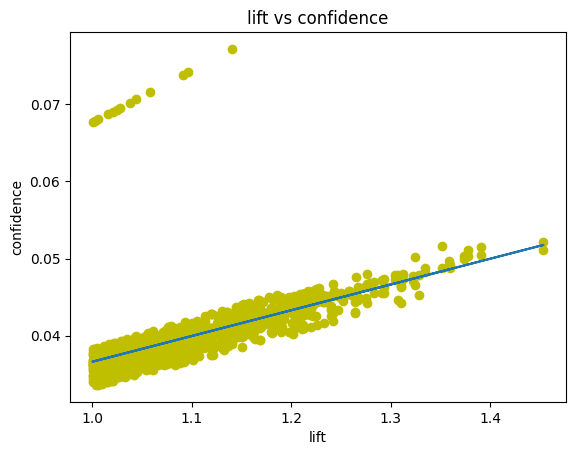

In [ ]:
plot_metrics_relationship(fp_growth_rule_lift, col1 = 'lift', col2 = 'confidence')

ทำการเรียกใช้ function compute_association_rule เพื่อทำการประมวลผลหลังจาก algorithm ด้วย association rule ทำการจับคู่สินค้า A และ สินค้า B ว่ามีสินค้าใดบ้างที่ลูกค้ามักจะหยิบลงตะกร้าคู่กัน โดย association rule กำหนด metric = confidence

In [ ]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.01)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Toothpaste),(Hair Gel),0.067633,0.036600,0.0021,0.031050,0.848355,-3.753800e-04,0.994272,-0.160876
1,(Hair Gel),(Toothpaste),0.036600,0.067633,0.0021,0.057377,0.848355,-3.753800e-04,0.989119,-0.156505
2,(Garden Hose),(Hair Gel),0.038233,0.036600,0.0014,0.036617,1.000472,6.600000e-07,1.000018,0.000490
3,(Hair Gel),(Garden Hose),0.036600,0.038233,0.0014,0.038251,1.000472,6.600000e-07,1.000019,0.000489
4,(Beef),(Hair Gel),0.037000,0.036600,0.0012,0.032432,0.886132,-1.542000e-04,0.995693,-0.117728


#Apriori Algorithm

ทำการเรียกใช้ function perform_rule_calculation เพื่อประมวลผลด้วย Apriori Algorithm และแสดงเวลาที่ใช้ในการประมวลผล

In [ ]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(dataset, rule_type = "apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Computed Apriori Algorithm
Apriori Execution took: 22.09026074409485 seconds


แสดงผลลัพธ์จากการประมวลผลด้วย Apriori Algorithm โดยแสดงเป็นตัวอย่างชุดข้อมูล 5 แถวแรก

In [ ]:
apriori_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,number_of_items
0,0.036267,(Air Freshener),1
1,0.035067,(Apple),1
2,0.035800,(BBQ Sauce),1
3,0.035533,(Baby Wipes),1
4,0.035867,(Banana),1


ทำการเรียกใช้ function compute_association_rule เพื่อทำการประมวลผลหลังจาก algorithm ด้วย association rule ทำการจับคู่สินค้า A และ สินค้า B ว่ามีสินค้าใดบ้างที่ลูกค้ามักจะหยิบลงตะกร้าคู่กัน โดย association rule กำหนด metric = lift

In [ ]:
apriori_rule_lift = compute_association_rule(apriori_matrix)
apriori_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Banana),(Air Freshener),0.035867,0.036267,0.001333,0.037175,1.025038,0.000033,1.000943,0.025335
1,(Air Freshener),(Banana),0.036267,0.035867,0.001333,0.036765,1.025038,0.000033,1.000932,0.025346
2,(Beef),(Air Freshener),0.037000,0.036267,0.001867,0.050450,1.391097,0.000525,1.014937,0.291945
3,(Air Freshener),(Beef),0.036267,0.037000,0.001867,0.051471,1.391097,0.000525,1.015256,0.291723
4,(Bread),(Air Freshener),0.035833,0.036267,0.001533,0.042791,1.179891,0.000234,1.006816,0.158130


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



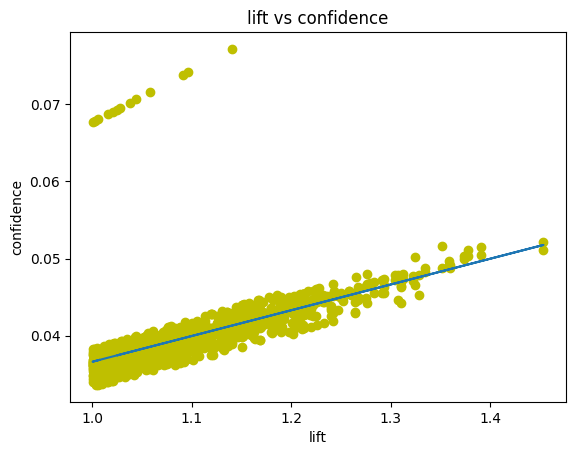

In [ ]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

ทำการเรียกใช้ function compute_association_rule เพื่อทำการประมวลผลหลังจาก algorithm ด้วย association rule ทำการจับคู่สินค้า A และ สินค้า B ว่ามีสินค้าใดบ้างที่ลูกค้ามักจะหยิบลงตะกร้าคู่กัน โดย association rule กำหนด metric = confidence

In [ ]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh = 0.02)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apple),(Air Freshener),0.035067,0.036267,0.001033,0.029468,0.812528,-0.000238,0.992995,-0.192970
1,(Air Freshener),(Apple),0.036267,0.035067,0.001033,0.028493,0.812528,-0.000238,0.993233,-0.193164
2,(Baby Wipes),(Air Freshener),0.035533,0.036267,0.001000,0.028143,0.775991,-0.000289,0.991641,-0.230361
3,(Air Freshener),(Baby Wipes),0.036267,0.035533,0.001000,0.027574,0.775991,-0.000289,0.991814,-0.230496
4,(Banana),(Air Freshener),0.035867,0.036267,0.001333,0.037175,1.025038,0.000033,1.000943,0.025335


plot graph แสดงการเปรียบเทียบระยะเวลาในการประมวลผลของ 2 algorithm
จากกราฟแสดงให้เห็นว่า FP - Growth Algorithm มีการประมวลผลที่เร็วกว่าอยู่ที่ 1 วินาที และ Apriori Algorithm ใช้ระยะเวลาอยู่ที่ 22 วินาที

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



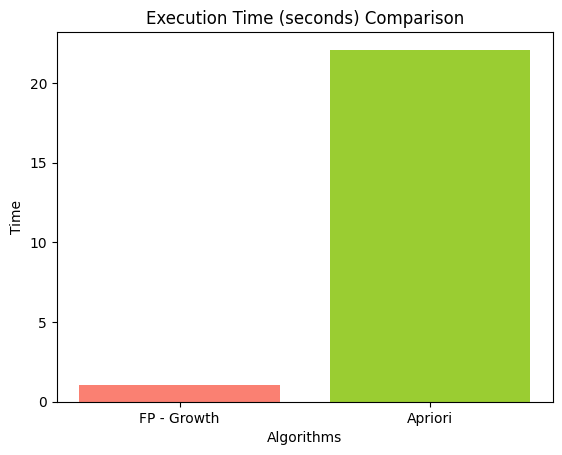

In [ ]:
algo1 = ['FP - Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]

compare_time_exec(algo1, algo2)

#Customer Segmentation using K-means Algorithm

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



สร้างตัวแปร data เพื่อทำการเลือกคอลัมน์ที่มีความเกี่ยวข้องกับพฤติกรรมการซื้อขาย โดยมีคอลัมน์ดังนี้ Product, City, Store_Type, Discount_Applied, Customer_Category, Season, Promotion, Payment_Method

In [ ]:
data = retail_data[['Product','City', 'Store_Type', 'Discount_Applied','Customer_Category','Season','Promotion','Payment_Method']].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



แสดงตัวอย่างชุดข้อมูลที่ทำการเลือกข้างต้น จากข้อมูลจะสังเกตได้ว่าข้อมูลแต่ละคอลัมน์มีช่วงของข้อมูลที่แตกต่างกัน

In [ ]:
X = data.iloc[:,1:]
key = X.columns
X.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Payment_Method
0,7,0,1,5,3,2,2
1,4,4,0,2,0,0,2
2,6,0,0,7,3,2,2
3,9,5,1,4,2,1,3
4,4,5,0,4,1,2,2


ทำการ Normalization เพื่อให้ค่าของข้อมูลอยู่ใน range เดียวกันที่ค่า 0 - 1

In [ ]:
min_max = StandardScaler()
X_scal = min_max.fit_transform(X)
X_scal = pd.DataFrame(X_scal,columns = key)
X_scal.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Payment_Method
0,0.871412,-1.467159,1.003071,0.653553,1.352064,1.226087,0.451593
1,-0.175078,0.874987,-0.996938,-0.655531,-1.340397,-1.219809,0.451593
2,0.522582,-1.467159,-0.996938,1.526275,1.352064,1.226087,0.451593
3,1.569071,1.460523,1.003071,0.217192,0.454577,0.003139,1.349334
4,-0.175078,1.460523,-0.996938,0.217192,-0.442910,1.226087,0.451593


ทำการลดมิติของชุดข้อมูลด้วย การใช้ PCA โดยกำหนด n_components = 2 หรือ 2 มิติ

In [ ]:
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X_scal)
X_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[-0.20375158,  1.08676027],
       [ 0.2971069 , -1.20003329],
       [ 0.65787197,  1.82883289],
       ...,
       [-1.74467439, -1.08272915],
       [ 0.0601932 , -1.03973582],
       [ 1.8109235 , -0.1463349 ]])

ทำการแบ่งชุดข้อมูลออกเป็น train set และ test set และแสดงขนาดของข้อมูลหลังจากทำการแบ่งข้อมูล

In [ ]:
X_train, X_test = train_test_split(X_new,test_size=0.05, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (28500, 2)
X_test shape is  (1500, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ทำการวน loop เพื่อหาค่า K ที่ดีที่สุดสำหรับการแบ่งกลุ่ม

In [ ]:
wcss = []
n = 20
for i in range(1,n):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 44)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/pyt

[57912.711744559565,
 38375.69496606403,
 25357.91661337594,
 19111.440007342317,
 15968.35071409251,
 13114.85789670503,
 11153.50384678769,
 10055.925692783872,
 8922.378736647264,
 8048.355644858744,
 7309.522586137102,
 6682.991807682647,
 6233.2336940099085,
 5784.310729948605,
 5433.650095412082,
 5097.713167015499,
 4771.198393620575,
 4553.972323082786,
 4326.1795711147815]

plot graph แสดงจำนวน cluster และ inertias

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



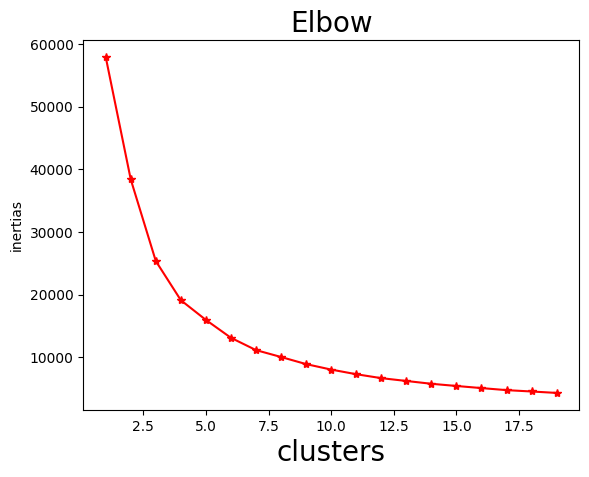

In [ ]:
plt.plot(range(1,n),wcss,marker = '*',c = 'r')
plt.title('Elbow',fontsize = 20)
plt.xlabel('clusters',fontsize = 20)
plt.ylabel('inertias')
plt.show()

plot graph แสดงจำนวน cluster ที่ดีที่สุด
จากกราฟจะได้ค่า k ที่ดีที่สุดอยู่ที่ k = 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/yellowbrick/style/colors.py:35: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.10/dist-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version ins

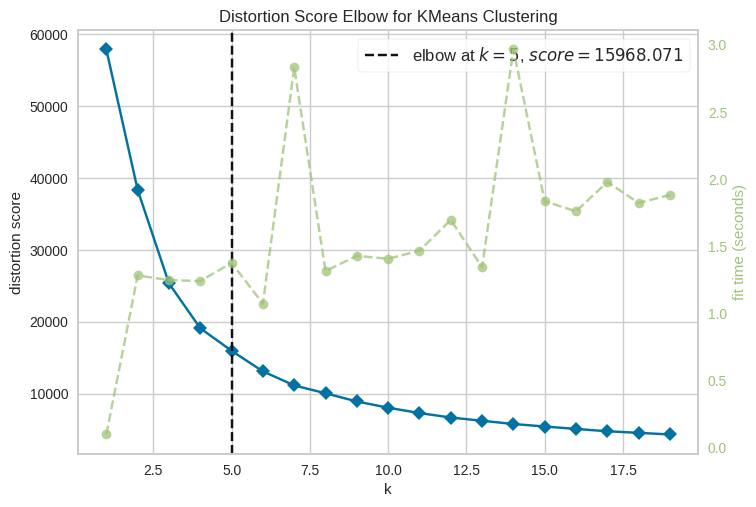

In [ ]:
#another way to show number of cluster
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

ทำการ train model ด้วย K - means clustering และกำหนดค่า k = 5

In [ ]:
#Number Of Cluster 5
KMeansModel = KMeans(n_clusters = 5,init = 'k-means++', random_state = 44,algorithm = 'auto')
y = KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



KMeansModel centers are :  [[ 0.42188821  1.28337298]
 [-0.43544879 -1.31743784]
 [ 1.35143896 -0.4134053 ]
 [-1.33684706  0.42521345]
 [ 0.00659513 -0.03999097]]
KMeansModel labels are :  [1 2 3 ... 4 4 1]
KMeansModel intertia is :  15968.35071409251
KMeansModel No. of iteration is :  17


plot graph แสดงการแบ่งกลุ่มของชุดข้อมูล train set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



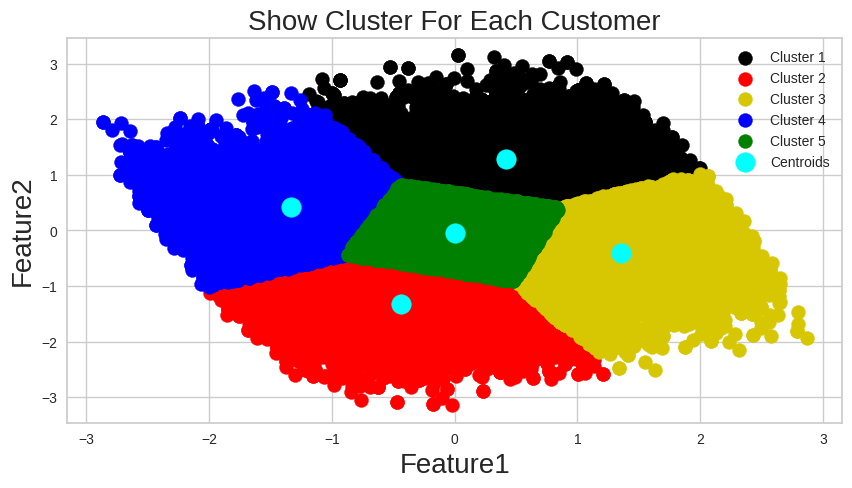

In [ ]:
# plotting all the clusters and their Centroids
plt.figure(figsize = (10,5))
plt.scatter(X_train[y==0,0], X_train[y==0,1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(X_train[y==1,0], X_train[y==1,1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X_train[y==2,0], X_train[y==2,1], s = 100, c = 'y', label = 'Cluster 3')
plt.scatter(X_train[y==3,0], X_train[y==3,1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(X_train[y==4,0], X_train[y==4,1], s = 100, c = 'green', label = 'Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s = 200, c = 'cyan', label = 'Centroids')
plt.title('Show Cluster For Each Customer',fontsize = 20)
plt.xlabel('Feature1',fontsize = 20)
plt.ylabel('Feature2',fontsize = 20)
plt.legend()
plt.show()

plot graph แสดงการแบ่งกลุ่มของชุดข้อมูล test set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



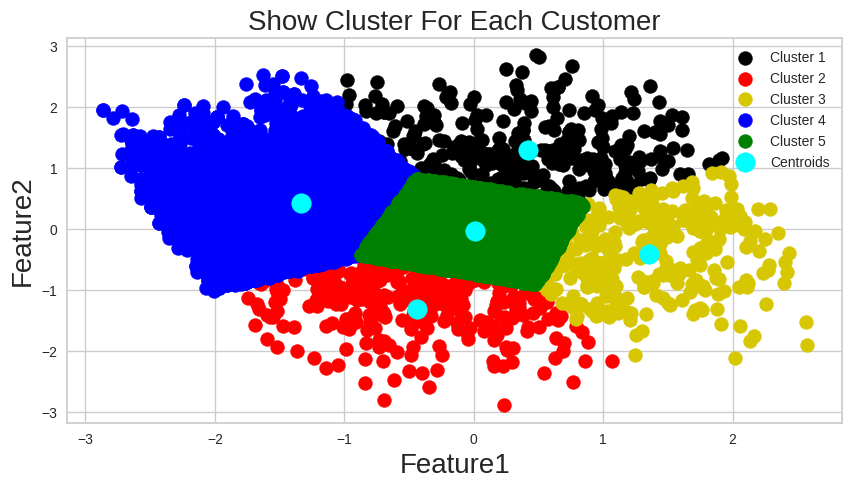

In [ ]:
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test[y_pred==2,0], X_test[y_pred==2,1], s=100, c='y', label='Cluster 3')
plt.scatter(X_train[y==3,0], X_train[y==3,1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(X_train[y==4,0], X_train[y==4,1], s = 100, c = 'green', label = 'Cluster 5')

# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

Silhouette Score (หรือ Silhouette Coefficient) คือค่าสถิติที่ใช้สำหรับวัดความกลมกลืนของกลุ่มข้อมูล (cluster) ในการวิเคราะห์การจัดกลุ่ม (clustering)

ค่า Silhouette Score นั้นจะอยู่ระหว่าง -1 ถึง 1


*   ค่าใกล้ 1: แสดงว่าจุดข้อมูลในกลุ่มนั้นอยู่ใกล้กันมาก (high cohesion)
*   ค่าใกล้ 0: แสดงว่าจุดข้อมูลในกลุ่มนั้นอยู่ใกล้กับกลุ่มอื่นมากกว่า (low cohesion)
*   ค่าใกล้ -1: แสดงว่าจุดข้อมูลในกลุ่มนั้นควรอยู่กับกลุ่มอื่น (misclassified)

จากการแสดงค่า Silhouette ซึ่งได้ค่าในการแบ่งกลุ่มที่ไม่ดีมากนัก เนื่องจากค่าค่อนข้างเข้าใกล้ 0

In [ ]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Silhouette Score train: 0.32534792117813083
Silhouette Score test: 0.33534368298047723
